# Asteroid Impact Probability

Author: **Marcin Sikorski**<br>
Date: December, 2022

This simple notebook aims to explore, summarize, and visualize potential future Earth collision events. The objects have been detected by the Sentry System based on currently available observations. Sentry is a highly automated collision monitoring system that continually scans the most current asteroid catalog for possibilities of future impact with Earth over the next 100 years.

The dataset has been generated and downloaded from [CNEOS website](https://cneos.jpl.nasa.gov/sentry/) for unconstrained settings (all available table settings).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# display first rows and header
pd.read_csv('cneos_sentry_summary_data.csv').head(n=10)

,Object Designation,Year Range,Potential Impacts,Impact Probability (cumulative),Vinfinity (km/s),H (mag),Estimated Diameter (km),Palermo Scale (cum.),Palermo Scale (max.),Torino Scale (max.),Unnamed: 10
0,101955 Bennu (1999 RQ36),2178-2290,157,5.700000e-04,5.99,20.6,0.490,-1.41,-1.59,NaN,a0101955
1,29075 (1950 DA),2880-2880,1,2.900000e-05,14.10,17.9,1.300,-2.05,-2.05,NaN,a0029075
2,(1979 XB),2056-2113,4,8.500000e-07,23.76,18.5,0.660,-2.72,-3.03,0.0,bJ79X00B
3,(2000 SG344),2069-2122,300,2.700000e-03,1.36,24.8,0.037,-2.79,-3.14,0.0,bK00SY4G
4,(2007 FT3),2024-2119,89,8.600000e-07,17.07,20.0,0.341,-2.83,-3.09,0.0,bK07F03T
5,(2010 RF12),2095-2122,70,1.000000e-01,5.10,28.4,0.007,-2.98,-2.98,0.0,bK10R12F
6,(2021 EU),2024-2093,8,7.700000e-05,21.38,25.4,0.028,-3.03,-3.07,0.0,bK21E00U
7,(2008 JL3),2027-2122,44,1.700000e-04,8.42,25.3,0.029,-3.08,-3.08,0.0,bK08J03L
8,(2005 ED224),2023-2064,3,2.600000e-06,24.96,24.0,0.054,-3.17,-3.18,0.0,bK05EM4D
9,(2022 PX1),2040-2040,1,3.000000e-06,35.11,22.3,0.120,-3.20,-3.20,0.0,bK22P01X


**Data Description**

Content and meaning of each column in the data is as below:
* **Object Designation** - temporary designation or permanent number of the object;
* **Year Range** - time span over which impacts have been detected;
* **Potential Impacts** - number of potential impacts detected by Sentry;
* **Impact Probability (cumulative)** - sum of the impact probabilities from all detected potential impacts;
* **V_infinity (km/s)** - velocity of the asteroid relative to Earth;
* **H (mag)** - absolute Magnitude, a measure of intrinsic brightness - the higher the value, the brighter the asteroid;
* **Estimated Diameter (km)** - estimated diameter of the object;
* **Palermo Scale (cum.)** - cumulative hazard rating according to the Palermo technical impact hazard scale;
* **Palermo Scale (max.)** - maximum hazard rating according to the Palermo technical impact hazard scale;
* **Torino Scale (max.)** - maximum detected hazard rating according to the Torino impact hazard scale.



In [2]:
# import and prepare dataframe
def load_dataset():
    # 1. load data from CSV file
    dataframe = pd.read_csv('cneos_sentry_summary_data.csv', header=None, skiprows=1)
    
    # 2. drop last, unnamed column
    dataframe = dataframe.iloc[:, :-1]
    
    # 3. rename header
    col_list = ['Object Name', 'Year Range', 'Potential Impacts',
                'Impact Probability (cum.)', 'Asteroid Velocity (km/s)',
                'Asteroid Magnitude (mag)', 'Estimated Diameter (km)',
                'Palermo Scale (cum.)', 'Palermo Scale (max.)', 'Torino Scale (max.)']
    dataframe.columns = col_list
    
    # 4. split column into two
    dataframe[['Start Year', 'End Year']] = dataframe['Year Range'].str.split('-', expand=True)
    
    # 5. drop unnecessary column by name
    dataframe = dataframe.drop('Year Range', axis=1)
    
    # 6. drop duplicates (if any)
    dataframe = dataframe.drop_duplicates()
    
    return dataframe

df = load_dataset()

# show results
df.head()

,Object Name,Potential Impacts,Impact Probability (cum.),Asteroid Velocity (km/s),Asteroid Magnitude (mag),Estimated Diameter (km),Palermo Scale (cum.),Palermo Scale (max.),Torino Scale (max.),Start Year,End Year
0,101955 Bennu (1999 RQ36),157,5.700000e-04,5.99,20.6,0.490,-1.41,-1.59,NaN,2178,2290
1,29075 (1950 DA),1,2.900000e-05,14.10,17.9,1.300,-2.05,-2.05,NaN,2880,2880
2,(1979 XB),4,8.500000e-07,23.76,18.5,0.660,-2.72,-3.03,0.0,2056,2113
3,(2000 SG344),300,2.700000e-03,1.36,24.8,0.037,-2.79,-3.14,0.0,2069,2122
4,(2007 FT3),89,8.600000e-07,17.07,20.0,0.341,-2.83,-3.09,0.0,2024,2119


In [3]:
# display data types and null values in each column
def dataframe_summary():
    
    # initialize lists
    var_list = df.columns.to_list()
    dtype_list = []
    null_list = []
    
    # loop through columns
    for col in df.columns:
        dtype_list.append(df[col].dtype)
        null_list.append(df[col].isnull().sum())
    
    # stack lists into dictionary
    dict = {'Variable': var_list, 'Data type': dtype_list, 'Null values': null_list}
    
    return pd.DataFrame(dict).style.hide_index()

dataframe_summary()

Variable,Data type,Null values
Object Name,object,0
Potential Impacts,int64,0
Impact Probability (cum.),float64,0
Asteroid Velocity (km/s),float64,3
Asteroid Magnitude (mag),float64,0
Estimated Diameter (km),float64,0
Palermo Scale (cum.),float64,0
Palermo Scale (max.),float64,0
Torino Scale (max.),float64,2
Start Year,object,0


1. Rows with NaN values for asteroid velocity will be dropped. Deleting rows will not impact further analysis and their quantity is not numerous.
2. Maximum Torino scale will be dropped. It only contains zeros which according to Torino impact scale means the likelihood of a collision is none hazardous. The column and does not bring any value.
3. We need to convert year columns into integers.

Additionally, we will check and make sure start years are not older then end years. However, these years can be equal.

In [4]:
# search for values other than 0.0 for Torino Scale
df.query('`Torino Scale (max.)` != 0.0')

,Object Name,Potential Impacts,Impact Probability (cum.),Asteroid Velocity (km/s),Asteroid Magnitude (mag),Estimated Diameter (km),Palermo Scale (cum.),Palermo Scale (max.),Torino Scale (max.),Start Year,End Year
0,101955 Bennu (1999 RQ36),157,0.000570,5.99,20.6,0.49,-1.41,-1.59,NaN,2178,2290
1,29075 (1950 DA),1,0.000029,14.10,17.9,1.30,-2.05,-2.05,NaN,2880,2880


There are only two rows with NaN values in this dataset.

In [5]:
# check years
df.query('`Start Year` > `End Year`')

,Object Name,Potential Impacts,Impact Probability (cum.),Asteroid Velocity (km/s),Asteroid Magnitude (mag),Estimated Diameter (km),Palermo Scale (cum.),Palermo Scale (max.),Torino Scale (max.),Start Year,End Year


Year columns are correct and no rows have inverted values.

In [6]:
# correct entites
# 1. filter out rows with filled cells
df = df[pd.notnull(df['Asteroid Velocity (km/s)'])]
    
# 2. drop Torino scale column
df = df.drop('Torino Scale (max.)', axis=1)
    
# 3. convert from objects to integers
df = df.astype({'Start Year': int, 'End Year': int})

# display number of rows
print('Number of Entites: {}'.format(df.shape[0]))

Number of Entites: 1505


### Exploring the Dataset with Visualizations

The dataset is ready for further exploration. We will focus on impact probability and search for patterns and relationships within other variables.

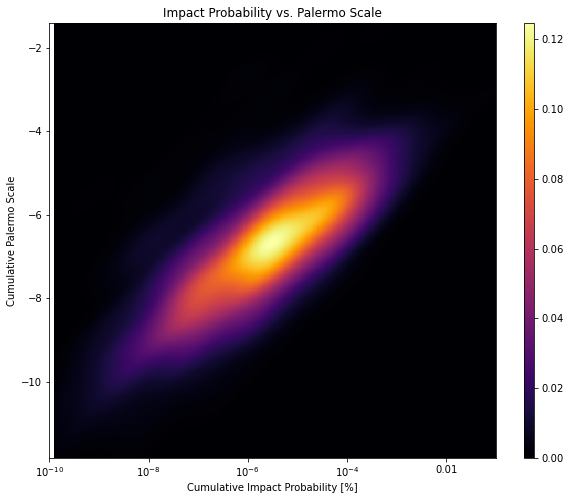

In [7]:
# plot Palermo scale vs. impact probability
def density_plot():
    from scipy.stats import gaussian_kde
    
    plt.figure(figsize=(10, 8))
    x = np.log10(df['Impact Probability (cum.)'])
    y = df['Palermo Scale (cum.)']
    
    # Gaussian KDE on a regular grid
    n_bins = 400
    k = gaussian_kde([x, y])
    xi, yi = np.mgrid[x.min():x.max():n_bins*1j, y.min():y.max():n_bins*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    
    plt.pcolormesh(xi, yi, zi.reshape(xi.shape), edgecolors='none', shading='auto', cmap='inferno')
    plt.xticks([-10, -8, -6, -4, -2], ['10$^{-10}$', '10$^{-8}$', '10$^{-6}$','10$^{-4}$', '0.01'])
    plt.title('Impact Probability vs. Palermo Scale')
    plt.xlabel('Cumulative Impact Probability [%]')
    plt.ylabel('Cumulative Palermo Scale')
    plt.colorbar(aspect=40)
    plt.show()

density_plot()

The positive slope indicates that the higher the impact probability, the higher the risk of damage (described in Palermo scale). According to the Palermo scale, any values above 0 indicate risk of impact. In this case, we don't have any risky objects present.

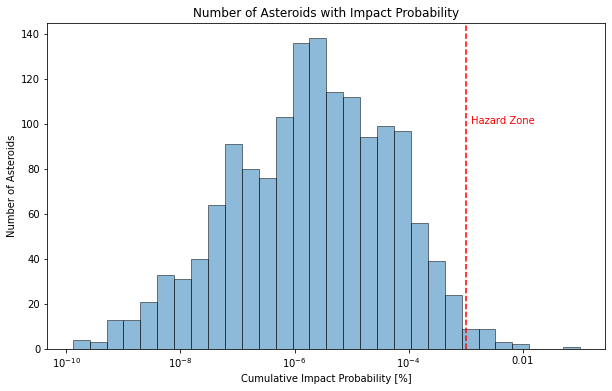

Number of Hazardous Objects: 22


In [8]:
# plot quantity for each impact probability
def plot_histogram():
    
    plt.figure(figsize=(10, 6))
    x = np.log10(df['Impact Probability (cum.)'])
    plt.hist(x=x, bins=30, edgecolor='black', alpha=0.5)
    
    plt.axvline(x=-3, linestyle='--', color='red')
    plt.text(x=-2.9, y=100, s='Hazard Zone', color='red') 
    plt.xticks([-10, -8, -6, -4, -2], ['10$^{-10}$', '10$^{-8}$', '10$^{-6}$','10$^{-4}$', '0.01'])
    plt.title('Number of Asteroids with Impact Probability')
    plt.xlabel('Cumulative Impact Probability [%]')
    plt.ylabel('Number of Asteroids')
    plt.show()
    
plot_histogram()

# display number of dangerous objects
print('Number of Hazardous Objects:', len(df.query('`Impact Probability (cum.)` > 10**(-3)')))

The histogram displays counts of asteroids per probability in each bin. The horizontal axis is the cumulative impact probability - the overall probability that the asteroid will hit Earth. The vertical axis is the number of asteroids which have that probability of striking Earth. The hazard zone corresponds to the percentage which is alarming for a potential collision. Luckily for us, the asteroids are not numerous.

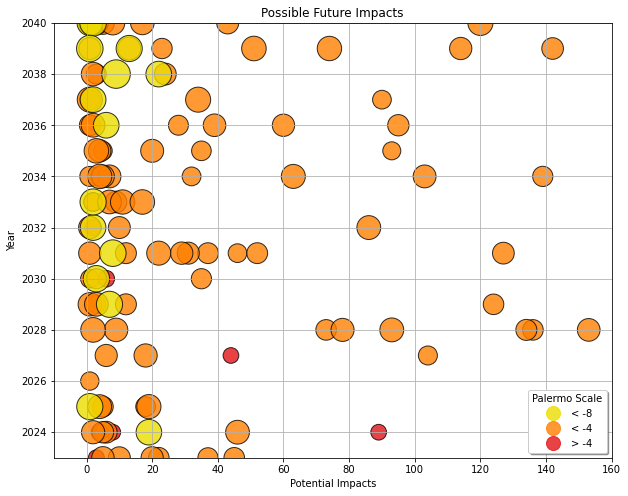

In [9]:
# plot potential impacts in the future years
def plot_possible_impacts():
    
    # coloring markers by Palermo scale
    def marker_color(impact):
        if impact < -8:
            return '#EDDE00' # yellow
        elif impact < -4:
            return '#FF8000' # orange
        else:
            return '#E41316' # red
        
    # scaling markers - Palermo scale x -80
    def marker_size(scale):
        return (scale) * -80
    
    # create new lists for plotting
    color_list = [marker_color(impact) for impact in df['Palermo Scale (max.)']]
    scale_list = [marker_size(scale) for scale in df['Palermo Scale (max.)']]

    plt.figure(figsize=(10, 8))
    plt.xlim(-10, 160)
    plt.ylim(2023, 2040)
    plt.scatter(x=df['Potential Impacts'], y=df['Start Year'], s=scale_list, c=color_list, alpha=0.8,
                marker='o', edgecolors='black')
    plt.title('Possible Future Impacts')
    plt.xlabel('Potential Impacts')
    plt.ylabel('Year')
    plt.grid(True)
    
    # create legend
    from matplotlib.lines import Line2D
    
    colors = ['#EDDE00', '#FF8000', '#E41316']
    labels = ['< -8', '< -4', '> -4']

    legend_elements = []
    for i, j in zip(colors, labels):
        legend_elements.append(Line2D([0],[0], color=i, marker='o', linestyle='None', markersize=14, alpha=0.8, label=j))

    plt.legend(handles=legend_elements, loc='lower right', title='Palermo Scale', ncol=1, shadow=True)
    plt.show() 

plot_possible_impacts()

The plot above displays the number of possible asteroid collisions within the nearby tracking period. Each marker (circle) represents one object. The x-axis shows the number of potential impacts. The color of the circle indicates the possibility to enter Earth in given year with the Palermo scale. Yellow expresses least possibility and red shows highest chance.

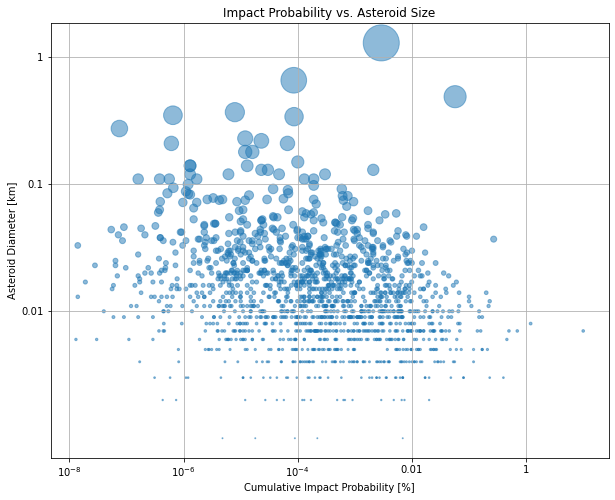

In [10]:
# scatter plot size vs. impact probability
def scatter_plot_size():
    plt.figure(figsize=(10, 8))
    x = np.log10(df['Impact Probability (cum.)']*100)
    y = np.log10(df['Estimated Diameter (km)'])
    d = df['Estimated Diameter (km)']
    
    plt.scatter(x, y, s=d*1000, alpha=0.5)
    plt.xticks([-8, -6, -4, -2, 0], ['10$^{-8}$', '10$^{-6}$','10$^{-4}$', '0.01', '1'])
    plt.yticks([-2, -1, 0], ['0.01', '0.1', '1'])
    plt.title('Impact Probability vs. Asteroid Size')
    plt.xlabel('Cumulative Impact Probability [%]')
    plt.ylabel('Asteroid Diameter [km]')
    plt.grid()
    plt.show()
    
scatter_plot_size()

The scatter plot shows the probability of impacts from asteroids based on their size (estimated diameter). In general (and thankfully), larger objects have a lower chance of colliding with Earth.

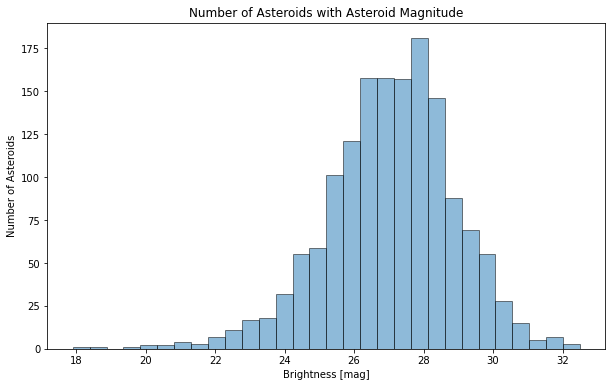

In [11]:
# plot quantity for each asteroid magnitude
def magnitude_histogram():
    
    plt.figure(figsize=(10, 6))
    x = df['Asteroid Magnitude (mag)']
    plt.hist(x=x, bins=30, edgecolor='black', alpha=0.5)
    plt.title('Number of Asteroids with Asteroid Magnitude')
    plt.xlabel('Brightness [mag]')
    plt.ylabel('Number of Asteroids')
    plt.show()
    
magnitude_histogram()

The histogram has negative skewness. It is quite obvious that objects with lower magnitude are less observable and therefore less numerous in the dataset. The highest quantity of asteroids is for range 26 to 28.

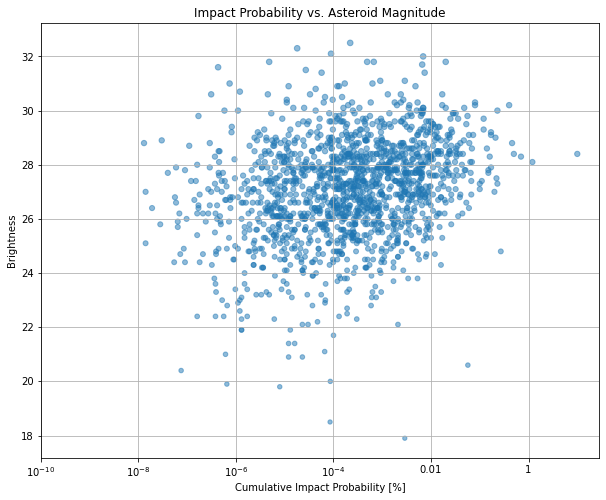

In [12]:
# scatter plot magnitude vs. impact probability
def scatter_plot_magnitude():
    
    plt.figure(figsize=(10, 8))
    x = np.log10(df['Impact Probability (cum.)'] * 100)
    y = df['Asteroid Magnitude (mag)']
    
    plt.scatter(x=x, y=y, s=y, alpha=0.5)
    plt.xticks([-10, -8, -6, -4, -2, 0], ['10$^{-10}$', '10$^{-8}$', '10$^{-6}$','10$^{-4}$', '0.01', '1'])
    plt.xlabel('Cumulative Impact Probability [%]')
    plt.ylabel('Brightness')
    plt.title('Impact Probability vs. Asteroid Magnitude')
    plt.grid()
    plt.show()
    
scatter_plot_magnitude()

There is no correlation between asteroid magnitude and impact probability. It would be impossible to use this column as an indicator for predicting probability.